# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**ML Problem**: Explore patterns in Airbnb listing descriptions using Word Embeddings (NLP) and K-means Clustering (Unsupervised Learning) to identify clusters of listings with similar characteristics.

1. Data set: Airbnb NYC "listings" data set: `airbnbListingsData.csv` 

2. Prediction and Label:
There is no prediction or label in this project. The goal is to explore patterns and relationships within Airbnb listing descriptions using NLP techniques and unsupervised learning.

3. Supervised or Unsupervised Learning:
Unsupervised learning, specifically a clustering problem.

4. Features:
The features for analysis include `name`, `description`, `neighborhood_overview`, `host_about`, `review_scores_value`, which might change later on.

5. Importance of the Problem:
Understanding patterns in Airbnb listing descriptions is beneficial for hosts to optimize their listings. By identifying most used keywords that attract travelers, hosts can improve their search engine optimization (SEO) strategies. This optimization can potentially increase the visibility of listings, attract more customers, and increase profit for hosts on the Airbnb platform.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    
**Answer:** I will start by exploring my data and dropping irrelevant features to avoid dealing with a large dataset. Next, I will check for missing values in the remaining features. Even though these fields are usually filled, it’s important to verify and handle any missing values if they occur. For text data preparation, I will remove stop words, perform lemmatization and stemming, and use tokenization.


2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?

**Answer:** For this problem, I will use Word2Vec, which does not require data scaling and generates word embedding vectors that capture word relationships. I will then apply K-Means clustering to identify clusters in the data based on the Word2Vec output.

 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?

**Answer:** Since K-Means clustering is an unsupervised method, performing on text data, and we haven’t learned evaluation metrics for this context, I will evaluate word embeddings and clusters based on my analysis, which may be subjective.


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### a. Exploring data

In [3]:
df[['name', 'description', 'neighborhood_overview', 'host_about', 'review_scores_value']].head()

,name,description,neighborhood_overview,host_about,review_scores_value
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,A New Yorker since 2000! My passion is creatin...,4.41
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,Laid-back Native New Yorker (formerly bi-coast...,4.64
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,"Rebecca is an artist/designer, and Henoch is i...",5.00
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",I used to work for a financial industry but no...,4.36
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,Welcome to family life with my oldest two away...,4.92


In [4]:
df['description'][40]

'The hottest neighborhood in New York City!<br />At this time and until further notice, we would like guests to be able to provide proof of COVID-19 vaccination or documentation from a licensed health care provider of having recovered from COVID-19 within the 90 days preceding arrival.<br /><br /><b>The space</b><br />Amazing loft in the Meatpacking District. The hottest neighborhood in NYC! Enjoy your own 1,100 square foot space within a 2,600 sq ft, two floor loft. Doorman, building, full sized bed (fits two) with true mattress and box frame (not an uncomfortable, thin, sleeper sofa mattress). Can sleep third guest on large sectional sofa, shared kitchen. Guests enjoy exclusive use of two bathrooms.<br /><br /><b>Other things to note</b><br />Some highlights of our neighborhood: The Chelsea Market, The Whitney Museum, The Highline Park, Shinola, Eataly, The Stonewall Inn, Warby Parker, The Hudson River Park, Google, Bumble and Bumble,'

In [5]:
df.shape

(28022, 50)

In [6]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

### b. Drop irrelevant features
We will create a copy of the orginial dataframe and remove irrelevant features, such as 'host_response_rate' and 'availability_60'.

In [7]:
df1 = df.drop(columns=['host_name',
       'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified','room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_rating','review_scores_location','neighbourhood_group_cleansed'])

In [8]:
print(df1.shape)
df1.head()

(28022, 5)


,name,description,neighborhood_overview,host_about,review_scores_value
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,A New Yorker since 2000! My passion is creatin...,4.41
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,Laid-back Native New Yorker (formerly bi-coast...,4.64
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,"Rebecca is an artist/designer, and Henoch is i...",5.00
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",I used to work for a financial industry but no...,4.36
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,Welcome to family life with my oldest two away...,4.92


### c. Handling missing values

In [9]:
df1.isnull().sum()

name                         5
description                570
neighborhood_overview     9816
host_about               10945
review_scores_value          0
dtype: int64

I assumed that my feature list (`name`, `description`, `neighborhood_overview`, `host_about`, `review_scores_value`) would be fully filled out because they seem essential, but that wasn’t the case. It turns out that `name` has the fewest missing values, while `host_about` has the most. 

Since my analysis focuses on listing descriptions, the `host_about` column is not essential. So, I will drop this column from the dataset. For other features with missing values, I plan to remove only the affected rows.

In [10]:
df1.drop('host_about', axis=1, inplace=True)
df1.dropna(subset=['neighborhood_overview', 'description', 'name'], inplace=True)
df1.shape

(18161, 4)

In [11]:
df1.isnull().sum() 

name                     0
description              0
neighborhood_overview    0
review_scores_value      0
dtype: int64

### d. Text data preparation
Use the built-in package `Gensim`, `re`, and `nltk` to preprocess the text. This function will remove some stop words, covert all text to lowercase, remove punctuation and tokenize the text. `Gensim` provides a helpful utility function that speeds up the early preprocessing step of NLP projects.

Regular Expression is a sequence of characters that forms a search pattern. `re`, or RegEx can be used to check if a string contains the specified search pattern.

Source: https://dylancastillo.co/posts/nlp-snippets-clean-and-tokenize-text-with-python.html

In [12]:
!pip install gensim
!pip install nltk
import gensim
import re # RegEx
import nltk
from nltk.corpus import stopwords


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:
df2 = df1
df2.columns

Index(['name', 'description', 'neighborhood_overview', 'review_scores_value'], dtype='object')

In [14]:
# Merge multiple column values into one column
df2['compiled_text'] = df2[['name', 'description', 
                            'neighborhood_overview']].apply(
    lambda row: '. '.join(row.astype(str)),axis=1)
df2.head()

,name,description,neighborhood_overview,review_scores_value,compiled_text
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,4.41,"Skylit Midtown Castle. Beautiful, spacious sky..."
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4.64,"Whole flr w/private bdrm, bath & kitchen(pls r..."
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",4.36,Large Furnished Room Near B'way . Please don’t...
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,4.92,Cozy Clean Guest Room - Family Apt. Our best g...
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,4.73,"Lovely Room 1, Garden, Best Area, Legal rental..."


In [15]:
df2['compiled_text'][0]

'Skylit Midtown Castle. Beautiful, spacious skylit studio in the heart of Midtown, Manhattan. <br /><br />STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS<br /><br /><b>The space</b><br />- Spacious (500+ft²), immaculate and nicely furnished & designed studio.<br />- Tuck yourself into the ultra comfortable bed under the skylight. Fall in love with a myriad of bright lights in the city night sky. <br />- Single-sized bed/convertible floor mattress with luxury bedding (available upon request).<br />- Gorgeous pyramid skylight with amazing diffused natural light, stunning architectural details, soaring high vaulted ceilings, exposed brick, wood burning fireplace, floor seating area with natural zafu cushions, modern style mixed with eclectic art & antique treasures, large full bath, newly renovated kitchen, air conditioning/heat, high speed WiFi Internet, and Apple TV.<br />- Centrally located in the he

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#stop_words

def clean_text(text):
    text = text.replace('\r', ' ').replace('\n', ' ') 
    text = re.sub(r"<.*?>", " ", text) # Remove any HTML tags
    return text

df2['cleaned_text'] = df2['compiled_text'].apply(clean_text)
df2['cleaned_text'][0]

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Skylit Midtown Castle. Beautiful, spacious skylit studio in the heart of Midtown, Manhattan.   STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS   The space  - Spacious (500+ft²), immaculate and nicely furnished & designed studio. - Tuck yourself into the ultra comfortable bed under the skylight. Fall in love with a myriad of bright lights in the city night sky.  - Single-sized bed/convertible floor mattress with luxury bedding (available upon request). - Gorgeous pyramid skylight with amazing diffused natural light, stunning architectural details, soaring high vaulted ceilings, exposed brick, wood burning fireplace, floor seating area with natural zafu cushions, modern style mixed with eclectic art & antique treasures, large full bath, newly renovated kitchen, air conditioning/heat, high speed WiFi Internet, and Apple TV. - Centrally located in the heart of Midtown Manhattan. Centrally located in the

In [17]:
def token_text(text):
    tokens = gensim.utils.simple_preprocess(text)
    return [word for word in tokens if word not in stop_words]

df2['processed_text'] = df2['cleaned_text'].apply(token_text)
df2['processed_text'][0]

['skylit',
 'midtown',
 'castle',
 'beautiful',
 'spacious',
 'skylit',
 'studio',
 'heart',
 'midtown',
 'manhattan',
 'stunning',
 'skylit',
 'studio',
 'bed',
 'single',
 'full',
 'bath',
 'full',
 'kitchen',
 'fireplace',
 'centrally',
 'located',
 'wifi',
 'apple',
 'tv',
 'sheets',
 'towels',
 'space',
 'spacious',
 'ft²',
 'immaculate',
 'nicely',
 'furnished',
 'designed',
 'studio',
 'tuck',
 'ultra',
 'comfortable',
 'bed',
 'skylight',
 'fall',
 'love',
 'myriad',
 'bright',
 'lights',
 'city',
 'night',
 'sky',
 'single',
 'sized',
 'bed',
 'convertible',
 'floor',
 'mattress',
 'luxury',
 'bedding',
 'available',
 'upon',
 'request',
 'gorgeous',
 'pyramid',
 'skylight',
 'amazing',
 'diffused',
 'natural',
 'light',
 'stunning',
 'architectural',
 'details',
 'soaring',
 'high',
 'vaulted',
 'ceilings',
 'exposed',
 'brick',
 'wood',
 'burning',
 'fireplace',
 'floor',
 'seating',
 'area',
 'natural',
 'zafu',
 'cushions',
 'modern',
 'style',
 'mixed',
 'eclectic',
 'art

In [18]:
df2.head()

,name,description,neighborhood_overview,review_scores_value,compiled_text,cleaned_text,processed_text
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,4.41,"Skylit Midtown Castle. Beautiful, spacious sky...","Skylit Midtown Castle. Beautiful, spacious sky...","[skylit, midtown, castle, beautiful, spacious,..."
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4.64,"Whole flr w/private bdrm, bath & kitchen(pls r...","Whole flr w/private bdrm, bath & kitchen(pls r...","[whole, flr, private, bdrm, bath, kitchen, pls..."
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",4.36,Large Furnished Room Near B'way . Please don’t...,Large Furnished Room Near B'way . Please don’t...,"[large, furnished, room, near, way, please, ex..."
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,4.92,Cozy Clean Guest Room - Family Apt. Our best g...,Cozy Clean Guest Room - Family Apt. Our best g...,"[cozy, clean, guest, room, family, apt, best, ..."
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,4.73,"Lovely Room 1, Garden, Best Area, Legal rental...","Lovely Room 1, Garden, Best Area, Legal rental...","[lovely, room, garden, best, area, legal, rent..."


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 

We will use the `processed_text` feature, which combines the `name`, `description`, `neighborhood_overview`, and `host_about` fields into one column after applying text processing techniques. In addition, we will initially use the `neighbourhood_group_cleansed` feature to determine the number of clusters (K) for K-means clustering.

We will remove the feature `review_scores_value`.

* Explain different data preparation techniques that you will use to prepare your data for modeling.

We will use text processing techniques like removing stop words and punctuations using built-in packages, `Gensim`, `re`, and `nltk` (done in Part 3). Since Word2Vec does not require input data to be scaled, we will focus on ensuring that the processed data is clean and of high quality.

* What is your model (or models)?

The models used are Word2Vec (word embeddings) and KMeans clustering (unsupervised learning).

* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Word2Vec model will be trained on the processed text to generate word embeddings. These embeddings will then be used as features for K-Means clustering, with the number of clusters (K) determined based on the number of unique values in the `neighbourhood_group_cleansed` feature. I haven’t learned evaluation metrics for KMeans applying on text data yet, so evaluataion will be based on my analysis, which may be subjective.

To improve models, we will experiment with different values for K number of clusters for KMeans model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### a. Word2Vec Model
W2V link: https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673

#### i. Train Model

In [20]:
w2v = gensim.models.Word2Vec(df2['processed_text'],
                             vector_size=100,
                             window=5,
                             min_count=2)

In [21]:
# retrieve vocabulary size
len(w2v.wv.key_to_index) 

18227

Let's do a small evaluation test to see how well our model performs by finding the most similar words.

In [22]:
# retrieve the vector for 'patio'
w2v.wv['patio']

array([-0.6407053 ,  1.39427   , -1.5774049 ,  2.5147517 , -0.94887424,
       -1.543836  , -0.12764534,  0.7538236 ,  1.7736453 , -0.38126057,
       -0.6410843 ,  1.2461308 ,  0.63828933,  0.5945907 ,  1.3184667 ,
       -1.1327296 , -0.37326375,  0.7864215 ,  0.13587764,  1.9098172 ,
       -0.40320668, -0.79512835,  0.26150692, -1.1239586 , -0.24270774,
       -0.2761215 , -0.3478193 , -0.11934825, -1.1104323 ,  0.47299686,
        0.00644175, -1.7741499 ,  1.0855461 , -1.140002  , -2.3088837 ,
        0.96963364,  0.5512108 ,  1.6041458 , -1.0076209 ,  0.79829913,
        1.1818233 , -1.528798  ,  1.9511311 ,  1.4255465 ,  0.44069645,
        0.22494452,  0.88726914, -2.5406973 ,  0.13219298, -0.25322732,
        1.0169352 ,  0.4825178 , -1.9952086 , -1.7419124 , -0.5844166 ,
        0.14827116,  0.61893255, -0.3897803 , -0.1819837 , -1.6131227 ,
        1.6805879 , -0.39838344,  0.9989558 ,  0.37901285, -1.3284006 ,
        1.6174109 ,  2.2875428 , -0.94081765, -0.35075516, -1.98

In [23]:
# find the most similar words for 'patio'
w2v.wv.most_similar('patio')

[('backyard', 0.8513279557228088),
 ('deck', 0.8086573481559753),
 ('porch', 0.7693937420845032),
 ('terrace', 0.7604976296424866),
 ('yard', 0.7500448822975159),
 ('balcony', 0.7384030818939209),
 ('grill', 0.7315650582313538),
 ('hammock', 0.7258840799331665),
 ('communal', 0.7194422483444214),
 ('outdoor', 0.7099080681800842)]

In [24]:
w2v.wv.most_similar('balcony')

[('terrace', 0.8337348699569702),
 ('deck', 0.7682928442955017),
 ('rooftop', 0.7550526261329651),
 ('patio', 0.7384031414985657),
 ('roof', 0.7172743082046509),
 ('backyard', 0.706142783164978),
 ('courtyard', 0.6791476607322693),
 ('juliet', 0.648800790309906),
 ('opens', 0.6458911299705505),
 ('roofdeck', 0.6295382976531982)]

In [25]:
w2v.wv.most_similar('manhattan')

[('nyc', 0.6403905749320984),
 ('city', 0.6125967502593994),
 ('downtown', 0.6012438535690308),
 ('takes', 0.53288334608078),
 ('train', 0.5100176930427551),
 ('midtown', 0.5095461010932922),
 ('trains', 0.4979162812232971),
 ('less', 0.469867080450058),
 ('soho', 0.4696645736694336),
 ('action', 0.4547417461872101)]

In [26]:
# compute the similarity between two words in the vocabulary
w2v.wv.similarity(w1='cheese', w2='patio')

-0.22301754

So far, for all the words we’ve tested, the model has returned words that are quite similar.

In [27]:
top25 = w2v.wv.index_to_key[:25]
top25

['apartment',
 'space',
 'room',
 'bedroom',
 'access',
 'park',
 'restaurants',
 'kitchen',
 'neighborhood',
 'brooklyn',
 'manhattan',
 'private',
 'new',
 'away',
 'walk',
 'bed',
 'one',
 'located',
 'guest',
 'living',
 'bathroom',
 'home',
 'great',
 'full',
 'city']

#### ii. Visualise word2vec generated from gensim using pca

Visualizing Word2Vec embeddings is one way to evaluate how well the model performs.

Kaggle: https://www.kaggle.com/code/chmasgun/word2vec-and-visualization-with-pca

In [28]:
# get a single list of words for the plot
vocab = list(w2v.wv.key_to_index)
X = w2v.wv[vocab]
X

array([[-6.5415782e-01, -1.4196572e-01, -1.1911378e+00, ...,
         4.7292960e-01, -6.3334471e-01, -4.4657987e-01],
       [ 6.5080899e-01,  3.0235732e-01, -1.9340040e-01, ...,
         1.2754035e-01, -1.6235073e+00, -5.3281647e-01],
       [ 5.5692118e-01,  5.4991269e-01, -1.9712800e+00, ...,
        -3.9660491e-02,  3.8606226e-01, -7.7360195e-01],
       ...,
       [-1.9650210e-02,  1.1859209e-02,  1.2394782e-02, ...,
        -1.6280444e-02,  4.5628371e-03, -2.2099528e-02],
       [-4.9406353e-02,  5.4691706e-02,  2.0119125e-02, ...,
        -4.9083330e-02,  2.1147940e-02, -7.1617053e-03],
       [-3.1752922e-02,  3.3717681e-02,  2.8195178e-02, ...,
        -6.7891903e-02,  6.1230088e-04,  2.2634594e-02]], dtype=float32)

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca[0]

array([4.6986804, 8.200644 ], dtype=float32)

In [30]:
df_w2v = pd.DataFrame(X_pca, columns=['x', 'y'])
df_w2v['words'] = vocab
df_w2v.head()

,x,y,words
0,4.698680,8.200644,apartment
1,5.026530,5.457211,space
2,8.660824,4.539463,room
3,7.645124,6.597240,bedroom
4,4.892507,5.427520,access


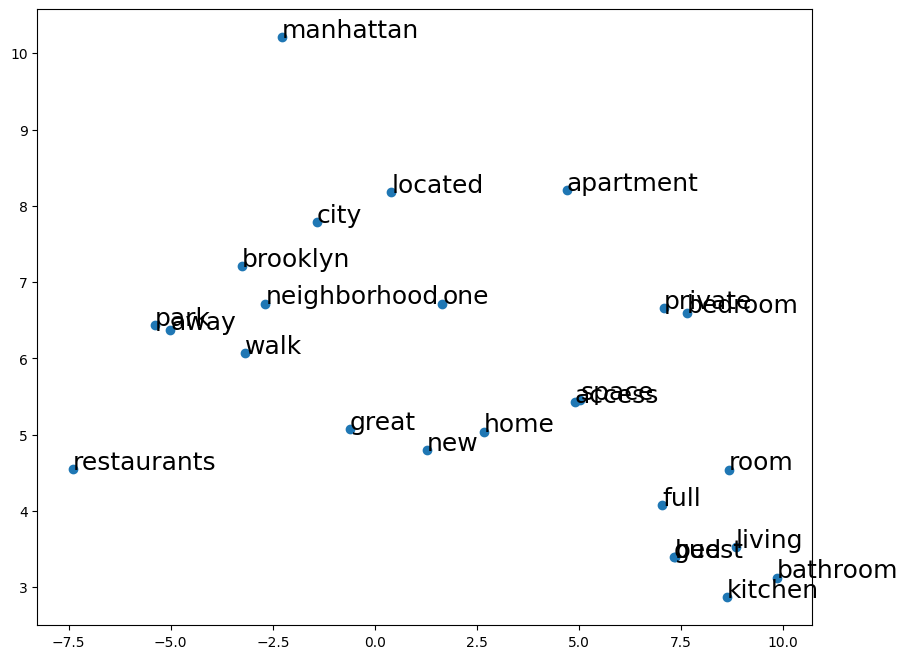

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(df_w2v['x'][:25], df_w2v['y'][:25])

for i in range(len(df_w2v['words'][:25])):
    plt.annotate(df_w2v['words'][i], (df_w2v['x'][i], df_w2v['y'][i]), fontsize=18)

There are too many words to create a graph with everything (at least not on my laptop?). Let's create a function to graph a few intervals to get an idea how the words relate to each other! Note that visualizing word embeddings in intervals might overlook some information as we're not visualizing all data.

In [32]:
def visualize_w2v(start, stop):
    plt.figure(figsize=(10, 8))
    plt.scatter(df_w2v['x'][start:stop], df_w2v['y'][start:stop])

    for i in range(start, stop):
        plt.annotate(df_w2v['words'][i], (df_w2v['x'][i], df_w2v['y'][i]), fontsize=18)

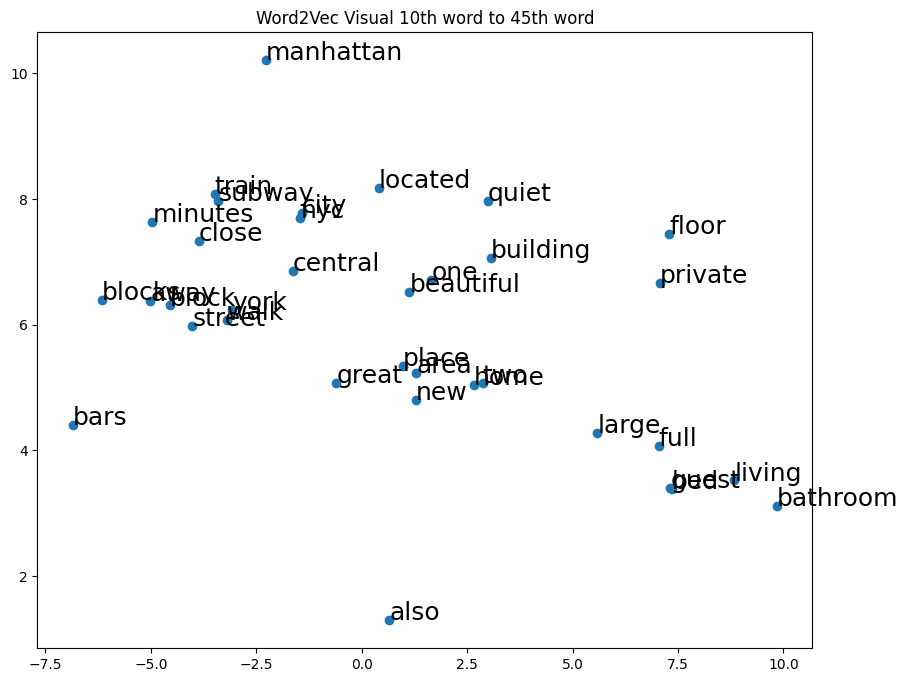

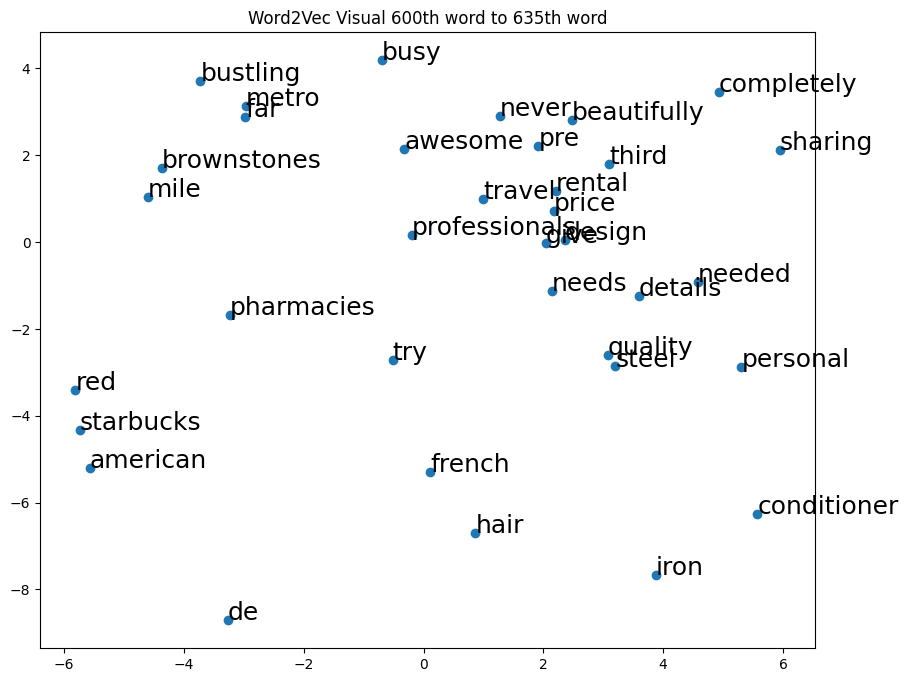

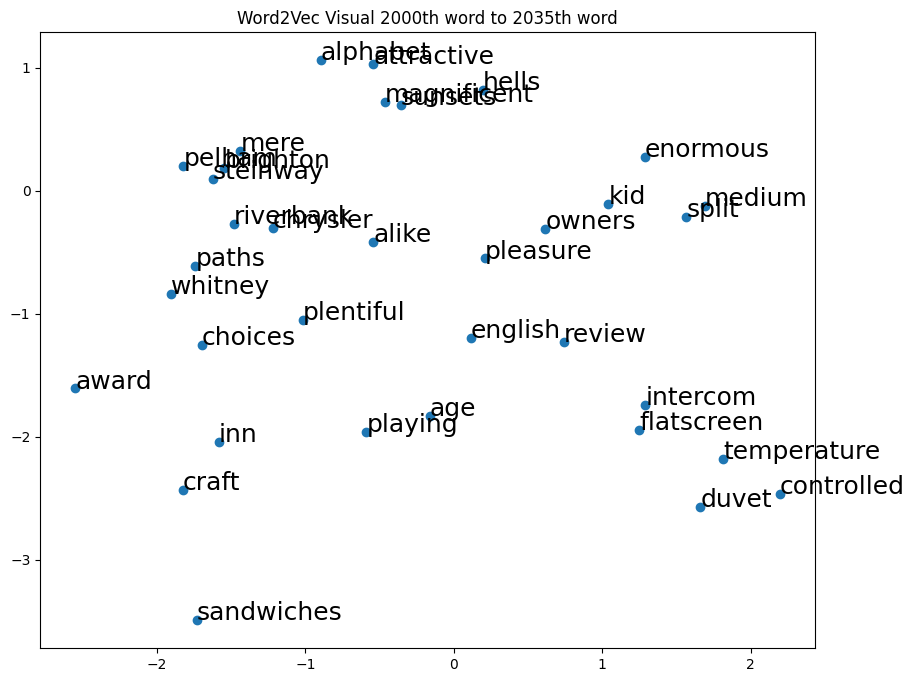

In [33]:
w2v_visual_range = [[10, 45], [600, 635], [2000, 2035]]
for start, stop in w2v_visual_range:
    visualize_w2v(start, stop)
    plt.title(f'Word2Vec Visual {start}th word to {stop}th word')

**Comment**: We’ve tested three words (Manhattan, balcony, and patio) and found that the Word2Vec model retrieves words that are quite similar. The visualizations also show meaningful clusters, such as "attractive" and "magnificent" (bottom graph) being close to each other, "Starbucks" and "American" (middle graph), and "NYC", "city" and "subway" (top graph). Given these results, we can consider moving on for now. We can revisit the model later to optimize it if needed after working with K-means clustering.

### b. Cluster data with K-Means

In [34]:
# The number of clusters K will be set to the number of 
# unique values contained in `neighbourhood_group_cleansed` feature
print(df['neighbourhood_group_cleansed'].unique())
K = df['neighbourhood_group_cleansed'].nunique()
K

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


5

In [35]:
coordinates = df_w2v[['x', 'y']]

kcluster_model = KMeans(n_clusters = K)
kcluster_model.fit(coordinates)

KMeans(n_clusters=5)

In [36]:
df_clustered = df_w2v.copy()
df_clustered['klabel'] = kcluster_model.labels_

In [37]:
df_clustered

,x,y,words,klabel
0,4.698680,8.200644,apartment,2
1,5.026530,5.457211,space,2
2,8.660824,4.539463,room,2
3,7.645124,6.597240,bedroom,2
4,4.892507,5.427520,access,2
...,...,...,...,...
18222,0.026943,0.184255,regency,0
18223,-0.040030,0.212734,mayors,0
18224,0.038086,0.314091,sout,0
18225,0.044522,0.165150,请加v,0


In [38]:
# center of cluster 0
center = kcluster_model.cluster_centers_[0]
center

array([0.00322344, 0.02708281], dtype=float32)

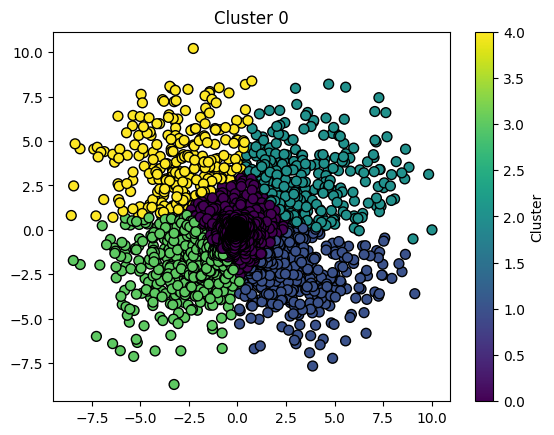

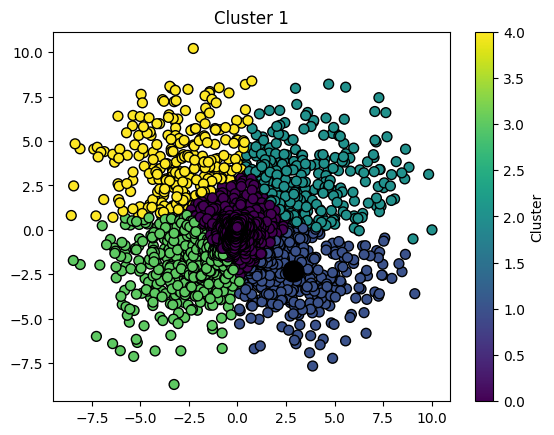

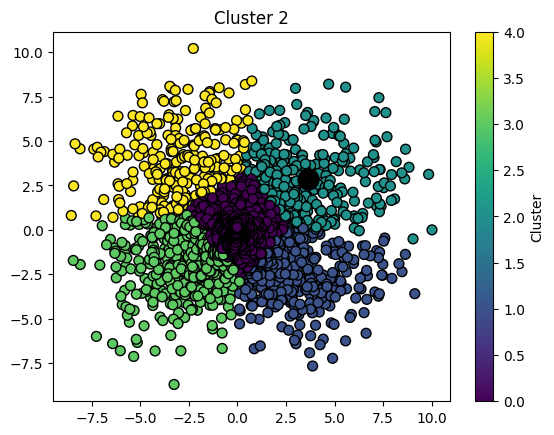

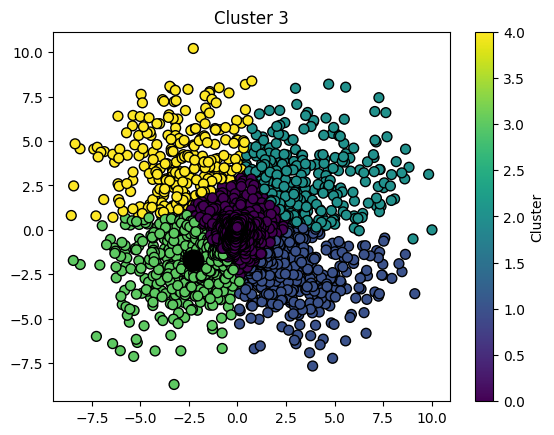

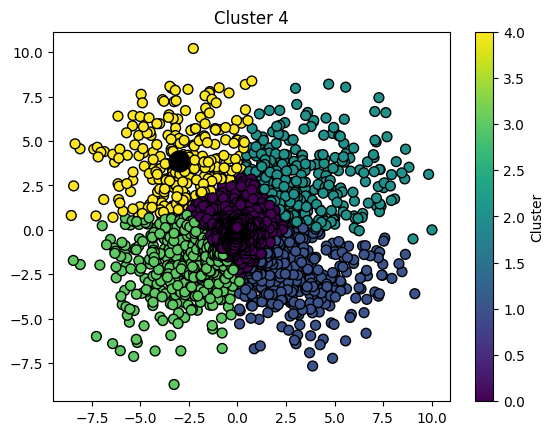

In [39]:
def plot_cluster_and_centroid(label):
    plt.scatter(df_clustered['x'], df_clustered['y'], c=df_clustered['klabel'], cmap='viridis', s=50, edgecolor='k')
    
    center = kcluster_model.cluster_centers_[label]
    plt.plot(center[0], center[1], 'ko', markersize=15)
    plt.colorbar(label='Cluster')

    plt.title(f'Cluster {label}')
    plt.show()

# Call plot_cluster_and_centroid() multiple times with each cluster label (0-9) as an argument 
# and analyze the resulting plots
for i in range(5):
    plot_cluster_and_centroid(i)

In [40]:
# compare the number of words in each clusterb
cluster_sizes = df_clustered['klabel'].value_counts()
cluster_sizes
# a large cluster might contain more general terms (cluster 1)
# a small cluster might contain more specific terms (cluster 4)

0    16472
3      734
1      461
2      300
4      260
Name: klabel, dtype: int64

In [41]:
df_clustered[df_clustered['klabel'] == 1]['words'].tolist()
# the words within each cluster are highly related to each other

['free',
 'use',
 'air',
 'desk',
 'table',
 'towels',
 'sofa',
 'microwave',
 'mattress',
 'shower',
 'cable',
 'appliances',
 'couch',
 'internet',
 'provided',
 'netflix',
 'extra',
 'smart',
 'provide',
 'cooking',
 'dishwasher',
 'fridge',
 'fresh',
 'included',
 'ac',
 'stove',
 'furniture',
 'service',
 'water',
 'refrigerator',
 'oven',
 'office',
 'keep',
 'linens',
 'speed',
 'cleaning',
 'additional',
 'smoking',
 'screen',
 'wall',
 'sheets',
 'set',
 'chair',
 'stocked',
 'heat',
 'must',
 'wi',
 'tea',
 'booking',
 'maker',
 'book',
 'fi',
 'lounge',
 'tub',
 'built',
 'comes',
 'cook',
 'ask',
 'original',
 'upon',
 'storage',
 'hot',
 'key',
 'fee',
 'wood',
 'breakfast',
 'toaster',
 'dresser',
 'conditioning',
 'read',
 'allowed',
 'used',
 'pm',
 'utensils',
 'machine',
 'per',
 'request',
 'arrival',
 'stainless',
 'chairs',
 'leave',
 'mini',
 'gas',
 'iron',
 'personal',
 'steel',
 'quality',
 'details',
 'needs',
 'needed',
 'hair',
 'conditioner',
 'french',
 'c

### c. Word Frequency of each cluster
Analyze word frequency within each cluster using `Counter` to understand the common features or themes in each cluster.

Helpful link: https://stackoverflow.com/questions/20510768/count-frequency-of-words-in-a-list-and-sort-by-frequency

In [42]:
df_clustered[df_clustered['klabel'] == 1]['words']

100             free
103              use
149              air
176             desk
181            table
            ...     
2557    conditioners
2685             lcd
2703         blanket
2800        shelving
3015       sanitizer
Name: words, Length: 461, dtype: object

In [43]:
for cluster in df_clustered['klabel'].unique():
    cluster_words = df_clustered[df_clustered['klabel'] == cluster]['words']
    word_freq = Counter(cluster_words)
    print(f"Cluster {cluster} most common words:", word_freq.most_common(10),'\n')

Cluster 2 most common words: [('apartment', 1), ('space', 1), ('room', 1), ('bedroom', 1), ('access', 1), ('kitchen', 1), ('private', 1), ('new', 1), ('bed', 1), ('one', 1)] 

Cluster 4 most common words: [('park', 1), ('restaurants', 1), ('neighborhood', 1), ('brooklyn', 1), ('manhattan', 1), ('away', 1), ('walk', 1), ('located', 1), ('great', 1), ('city', 1)] 

Cluster 0 most common words: [('also', 1), ('coffee', 1), ('like', 1), ('art', 1), ('including', 1), ('night', 1), ('check', 1), ('every', 1), ('want', 1), ('airport', 1)] 

Cluster 3 most common words: [('food', 1), ('local', 1), ('etc', 1), ('store', 1), ('music', 1), ('restaurant', 1), ('bar', 1), ('market', 1), ('little', 1), ('places', 1)] 

Cluster 1 most common words: [('free', 1), ('use', 1), ('air', 1), ('desk', 1), ('table', 1), ('towels', 1), ('sofa', 1), ('microwave', 1), ('mattress', 1), ('shower', 1)] 



**Comment**: Based on the most common words in each cluster, I assume following themes: 
- Cluster 3: space and apartment style
- Cluster 1: neighborhood
- Cluster 2: unclear
- Cluster 0: furniture
- Cluster 4: local businesses

Although we can identify a general theme for each cluster, they are not very distinct. Let's optimize the model by increasing the number of clusters, K.

### c. Optimizing K-Means Clustering
Experiment with different numbers of clusters, K: 15 and 30. Since I haven’t learned a metric to evaluate K-Means clustering yet, I will only test out two values and compare the models based on the clarity and meaningfulness of their clusters. We will stop once we identify better clusters, where "better" means clusters that exhibit clear themes or relationships.



In [44]:
def optimal_kmeans_exp(k):
    kcluster_model = KMeans(n_clusters = k)
    kcluster_model.fit(coordinates)
    df_clustered = df_w2v.copy()
    df_clustered['klabel'] = kcluster_model.labels_
    cluster_sizes = df_clustered['klabel'].value_counts()
    print(cluster_sizes) 
    
    for cluster in df_clustered['klabel'].unique():
        cluster_words = df_clustered[df_clustered['klabel'] == cluster]['words']
        word_freq = Counter(cluster_words)
        print(f"Cluster {cluster} most common words:", word_freq.most_common(10),'\n')
        

In [45]:
k = 15

print(f'KMeans Model with {k} number of clusters')
optimal_kmeans_exp(k)


KMeans Model with 15 number of clusters
1     10794
9      4131
0      1045
2       665
4       252
7       239
11      219
13      160
3       152
14      148
5        94
6        93
8        93
12       77
10       65
Name: klabel, dtype: int64
Cluster 6 most common words: [('apartment', 1), ('space', 1), ('room', 1), ('bedroom', 1), ('access', 1), ('kitchen', 1), ('private', 1), ('bed', 1), ('guest', 1), ('living', 1)] 

Cluster 12 most common words: [('park', 1), ('restaurants', 1), ('bars', 1), ('blocks', 1), ('walking', 1), ('shops', 1), ('distance', 1), ('many', 1), ('within', 1), ('minute', 1)] 

Cluster 10 most common words: [('neighborhood', 1), ('brooklyn', 1), ('manhattan', 1), ('away', 1), ('walk', 1), ('located', 1), ('great', 1), ('city', 1), ('street', 1), ('minutes', 1)] 

Cluster 14 most common words: [('new', 1), ('one', 1), ('home', 1), ('area', 1), ('building', 1), ('quiet', 1), ('two', 1), ('beautiful', 1), ('place', 1), ('cozy', 1)] 

Cluster 1 most common words:

In [46]:
k = 30

print(f'KMeans Model with {k} number of clusters')
optimal_kmeans_exp(k)


KMeans Model with 30 number of clusters
10    7555
23    4606
0     1843
14     910
27     640
15     352
4      330
11     231
24     205
20     158
5      154
18     132
28     128
21     117
16     102
2       86
8       72
26      69
7       64
9       59
19      57
29      53
13      52
3       51
22      43
6       36
17      33
1       33
12      33
25      23
Name: klabel, dtype: int64
Cluster 12 most common words: [('apartment', 1), ('space', 1), ('bedroom', 1), ('access', 1), ('private', 1), ('building', 1), ('floor', 1), ('quiet', 1), ('large', 1), ('spacious', 1)] 

Cluster 17 most common words: [('room', 1), ('kitchen', 1), ('bed', 1), ('guest', 1), ('living', 1), ('bathroom', 1), ('full', 1), ('guests', 1), ('queen', 1), ('size', 1)] 

Cluster 6 most common words: [('park', 1), ('restaurants', 1), ('away', 1), ('bars', 1), ('blocks', 1), ('walking', 1), ('shops', 1), ('distance', 1), ('many', 1), ('within', 1)] 

Cluster 29 most common words: [('neighborhood', 1), ('brook

**Comment**: Increasing the number of clusters in K-Means can lead to more specific word relationships, but too many clusters can result in overfitting.

I will compare two similar clusters from each group:

Cluster 3 (K = 15): Most common words are [('park', 1), ('neighborhood', 1), ('brooklyn', 1), ('manhattan', 1), ('walk', 1), ('located', 1), ('great', 1), ('city', 1), ('street', 1), ('minutes', 1)].
Cluster 18 (K = 30): Most common words are [('neighborhood', 1), ('brooklyn', 1), ('manhattan', 1), ('walk', 1), ('city', 1), ('street', 1), ('minutes', 1), ('subway', 1), ('train', 1), ('close', 1)].
The words in each cluster are similar, with the K=30 model being more specific. For this particular comparison, the K=30 model appears more optimal. However, since we lack an evaluation method and have too many clusters to analyze thoroughly, we can compare both clusters, extract the most frequent words, and apply them to our Airbnb listing descriptions for now to optimize our listings.